In [2]:
#Import libraries
from datetime import datetime
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import norm
from scipy import stats
import scipy as sp
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_regression
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")
plt.style.use('seaborn')
%matplotlib inline
pd.set_option('display.max_columns', 300)

In [10]:
df = pd.read_csv('list_working.csv',index_col=0)

In [11]:
df.head()

,host_response_rate,host_is_superhost,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,room_Private room,nbrhd_Bernal Heights,nbrhd_Castro/Upper Market,nbrhd_Chinatown,nbrhd_Crocker Amazon,nbrhd_Diamond Heights,nbrhd_Downtown/Civic Center,nbrhd_Excelsior,nbrhd_Financial District,nbrhd_Glen Park,nbrhd_Golden Gate Park,nbrhd_Haight Ashbury,nbrhd_Inner Richmond,nbrhd_Inner Sunset,nbrhd_Lakeshore,nbrhd_Marina,nbrhd_Mission,nbrhd_Nob Hill,nbrhd_Noe Valley,nbrhd_North Beach,nbrhd_Ocean View,nbrhd_Outer Mission,nbrhd_Outer Richmond,nbrhd_Outer Sunset,nbrhd_Pacific Heights,nbrhd_Parkside,nbrhd_Potrero Hill,nbrhd_Presidio,nbrhd_Presidio Heights,nbrhd_Russian Hill,nbrhd_Seacliff,nbrhd_South of Market,nbrhd_Twin Peaks,nbrhd_Visitacion Valley,nbrhd_West of Twin Peaks,nbrhd_Western Addition,prop_Condominium,prop_Guest suite,prop_House
0,100,1,1.0,37.76931,-122.43386,3,1.0,1.0,2.0,170.0,2,25.0,1,217,97.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,100,1,2.0,37.75402,-122.45805,2,1.0,1.0,1.0,99.0,2,20.0,1,160,94.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,80,0,2.0,37.74511,-122.42102,5,1.0,2.0,3.0,235.0,2,0.0,30,111,98.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,86,1,10.0,37.76669,-122.45250,2,4.0,1.0,1.0,65.0,1,12.0,32,18,86.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,86,1,10.0,37.76487,-122.45183,2,4.0,1.0,1.0,65.0,1,12.0,32,8,93.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df.columns

Index(['Unnamed: 0', 'host_response_rate', 'host_is_superhost',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'price', 'guests_included',
       'extra_people', 'minimum_nights', 'number_of_reviews',
       'review_scores_rating', 'instant_bookable', 'room_Private room',
       'nbrhd_Bernal Heights', 'nbrhd_Castro/Upper Market', 'nbrhd_Chinatown',
       'nbrhd_Crocker Amazon', 'nbrhd_Diamond Heights',
       'nbrhd_Downtown/Civic Center', 'nbrhd_Excelsior',
       'nbrhd_Financial District', 'nbrhd_Glen Park', 'nbrhd_Golden Gate Park',
       'nbrhd_Haight Ashbury', 'nbrhd_Inner Richmond', 'nbrhd_Inner Sunset',
       'nbrhd_Lakeshore', 'nbrhd_Marina', 'nbrhd_Mission', 'nbrhd_Nob Hill',
       'nbrhd_Noe Valley', 'nbrhd_North Beach', 'nbrhd_Ocean View',
       'nbrhd_Outer Mission', 'nbrhd_Outer Richmond', 'nbrhd_Outer Sunset',
       'nbrhd_Pacific Heights', 'nbrhd_Parkside', 'nbrhd_Potrero Hill',
       'nbrhd_P

In [12]:
df_tgt = df.price
df_feat = df.drop(['price'], axis=1)
df_feat.head()

,host_response_rate,host_is_superhost,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,guests_included,extra_people,minimum_nights,number_of_reviews,review_scores_rating,instant_bookable,room_Private room,nbrhd_Bernal Heights,nbrhd_Castro/Upper Market,nbrhd_Chinatown,nbrhd_Crocker Amazon,nbrhd_Diamond Heights,nbrhd_Downtown/Civic Center,nbrhd_Excelsior,nbrhd_Financial District,nbrhd_Glen Park,nbrhd_Golden Gate Park,nbrhd_Haight Ashbury,nbrhd_Inner Richmond,nbrhd_Inner Sunset,nbrhd_Lakeshore,nbrhd_Marina,nbrhd_Mission,nbrhd_Nob Hill,nbrhd_Noe Valley,nbrhd_North Beach,nbrhd_Ocean View,nbrhd_Outer Mission,nbrhd_Outer Richmond,nbrhd_Outer Sunset,nbrhd_Pacific Heights,nbrhd_Parkside,nbrhd_Potrero Hill,nbrhd_Presidio,nbrhd_Presidio Heights,nbrhd_Russian Hill,nbrhd_Seacliff,nbrhd_South of Market,nbrhd_Twin Peaks,nbrhd_Visitacion Valley,nbrhd_West of Twin Peaks,nbrhd_Western Addition,prop_Condominium,prop_Guest suite,prop_House
0,100,1,1.0,37.76931,-122.43386,3,1.0,1.0,2.0,2,25.0,1,217,97.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,100,1,2.0,37.75402,-122.45805,2,1.0,1.0,1.0,2,20.0,1,160,94.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,80,0,2.0,37.74511,-122.42102,5,1.0,2.0,3.0,2,0.0,30,111,98.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,86,1,10.0,37.76669,-122.45250,2,4.0,1.0,1.0,1,12.0,32,18,86.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,86,1,10.0,37.76487,-122.45183,2,4.0,1.0,1.0,1,12.0,32,8,93.0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [13]:
df_tgt

0       170.0
1        99.0
2       235.0
3        65.0
4        65.0
        ...  
7108    299.0
7109    100.0
7110    250.0
7111    200.0
7113    187.0
Name: price, Length: 5859, dtype: float64

In [15]:

X_train, X_test, y_train, y_test = train_test_split(df_feat, df_tgt, random_state=13,test_size=0.2)

#check the shape of the results
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape)
print("Training set - Features: ", X_test.shape, "Target: ",y_test.shape)

Training set - Features:  (4687, 54) Target:  (4687,)
Training set - Features:  (1172, 54) Target:  (1172,)


In [17]:

reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [16]:
df_feat_col = pd.DataFrame(data = df_feat.columns.values, columns=['Features'])
df_feat_col

,Features
0,host_response_rate
1,host_is_superhost
2,host_total_listings_count
3,latitude
4,longitude
5,accommodates
6,bathrooms
7,bedrooms
8,beds
9,guests_included


In [18]:

p_values = f_regression(X_train,y_train)[1]
df_feat_col['Weights'] = reg.coef_
df_feat_col['P Values'] = p_values.round(3)
df_feat_col.sort_values(['Weights'], ascending=False)

,Features,Weights,P Values
3,latitude,1.301193e+03,0.000
4,longitude,1.783895e+02,0.150
25,nbrhd_Golden Gate Park,1.000764e+02,0.029
39,nbrhd_Pacific Heights,6.676471e+01,0.000
29,nbrhd_Lakeshore,5.668130e+01,0.171
24,nbrhd_Glen Park,5.630609e+01,0.016
33,nbrhd_Noe Valley,5.079021e+01,0.007
17,nbrhd_Castro/Upper Market,4.904215e+01,0.000
23,nbrhd_Financial District,4.813163e+01,0.262
35,nbrhd_Ocean View,4.748207e+01,0.001


In [24]:
r2_train = reg.score(X_train, y_train)
r2_train = round(r2_train, 3)
n = X_train.shape[0]
p = X_train.shape[1]
adjusted_r2_train = 1-(1-r2_train)*(n-1)/(n-p-1)
adjusted_r2_train = round(adjusted_r2_train, 3)
adjusted_r2_train


0.5875438684629265

In [29]:


y_train_pred = reg.predict(X_train)
train_rmse = np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))
train_rmse = round(train_rmse, 3)
train_rmse

92.06411103629387

In [26]:
reg.score(X_test, y_test)
r2_test = reg.score(X_test, y_test)
n = X_test.shape[0]
p = X_test.shape[1]

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
r2_test = round(r2_test, 3)
adjusted_r2_test = round(adjusted_r2_test, 3)
adjusted_r2_test


0.5305425395040037

In [28]:
y_test_pred = reg.predict(X_test)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
test_rmse

92.3525663600125

Text(0, 0.5, 'Predictions')

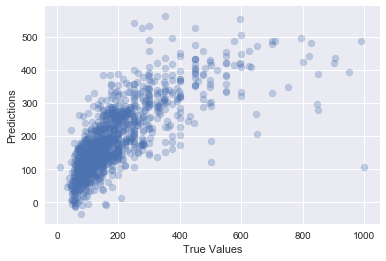

In [30]:
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [31]:

summary_df = pd.DataFrame(columns=['Model', 'Description','Root Mean Squared Error (RMSE)', 'R-squared (training)', 'Adjusted R-squared (training)','R-squared (test)', 'Adjusted R-squared (test)'])
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)


In [32]:
summary_df = summary_df.append({'Model' : 'Multiple Regression-1', 'Description' : 'All Features' , 'Root Mean Squared Error (RMSE)' : train_rmse, 'R-squared (training)' : r2_train, 'Adjusted R-squared (training)': adjusted_r2_train, 'R-squared (test)' : r2_test, 'Adjusted R-squared (test)' : adjusted_r2_test} , ignore_index=True)
summary_df

,Model,Description,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test)
0,Multiple Regression-1,All Features,92.064111,0.592297,0.587544,0.552191,0.530543
